<AxesSubplot: xlabel='time'>

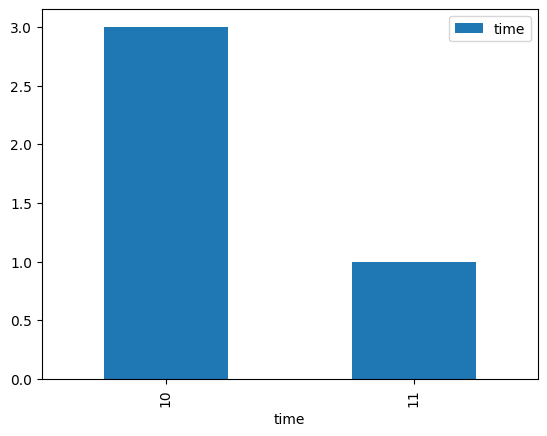

In [2]:
import pandas as pd

# Sample data
data = ['2022-01-01 10:00:00.000',
        '2022-01-01 10:01:00.000',
        '2022-01-01 10:02:00.000',
        '2022-01-01 11:00:00.000']

# Convert data to a pandas dataframe
df = pd.DataFrame(data, columns=['time'])

# Convert the time column to a datetime type
df['time'] = pd.to_datetime(df['time'])

# Group by hour and count the number of accesses
df_hourly = df.groupby(df['time'].dt.hour).count()

# Plot the data
df_hourly.plot(kind='bar')


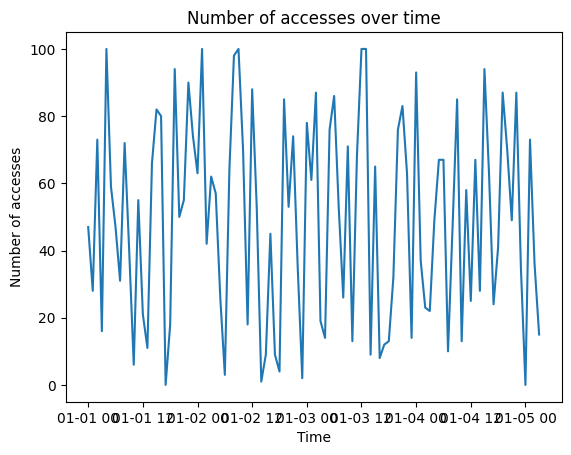

In [3]:
import matplotlib.pyplot as plt
import random
import datetime

# Generate random data for the number of accesses
num_accesses = [random.randint(0,100) for i in range(100)]

# Generate a list of 100 datetime objects, spaced one hour apart
times = [datetime.datetime(2022, 1, 1) + datetime.timedelta(hours=i) for i in range(100)]

# Plot the number of accesses against the time
plt.plot(times, num_accesses)

# Add axis labels and a title
plt.xlabel('Time')
plt.ylabel('Number of accesses')
plt.title('Number of accesses over time')

# Show the plot
plt.show()


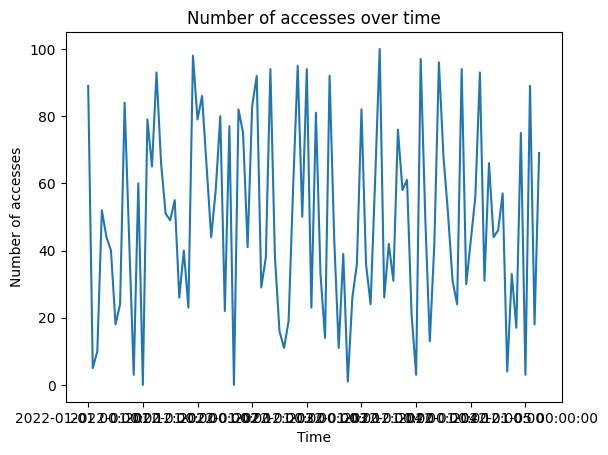

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random
import datetime

# Generate random data for the number of accesses
num_accesses = [random.randint(0,100) for i in range(100)]

# Generate a list of 100 datetime objects, spaced one hour apart
times = [datetime.datetime(2022, 1, 1) + datetime.timedelta(hours=i) for i in range(100)]

# Plot the number of accesses against the time
fig, ax = plt.subplots()
ax.plot(times, num_accesses)

# Set the x-axis to display dates
ax.xaxis_date()

# Format the x-axis labels using a date formatter
date_formatter = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(date_formatter)

# Add axis labels and a title
plt.xlabel('Time')
plt.ylabel('Number of accesses')
plt.title('Number of accesses over time')

# Show the plot
plt.show()

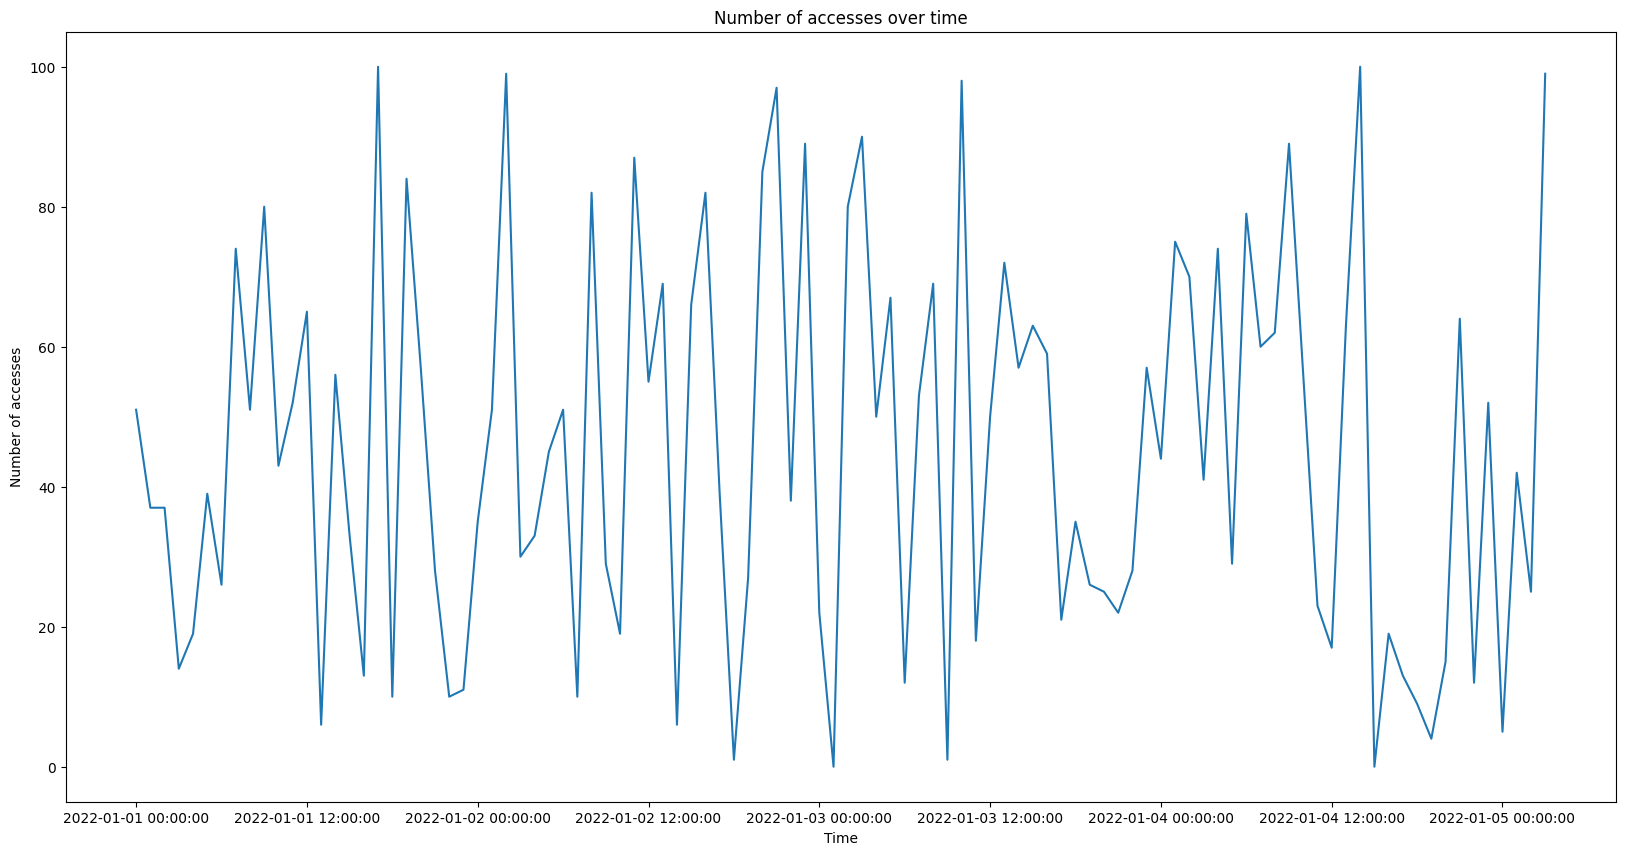

In [158]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random
import datetime

# Generate random data for the number of accesses
num_accesses = [random.randint(0,100) for i in range(100)]

# Generate a list of 100 datetime objects, spaced one hour apart
times = [datetime.datetime(2022, 1, 1) + datetime.timedelta(hours=i) for i in range(100)]

# Plot the number of accesses against the time
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(times, num_accesses)

# Set the x-axis to display dates
ax.xaxis_date()

# Format the x-axis labels using a date formatter
date_formatter = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(date_formatter)

# Rotate the x-axis labels and adjust the horizontal alignment
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
    tick.set_horizontalalignment("right")

# Add axis labels and a title
plt.xlabel('Time')
plt.ylabel('Number of accesses')
plt.title('Number of accesses over time')

# Show the plot
plt.show()

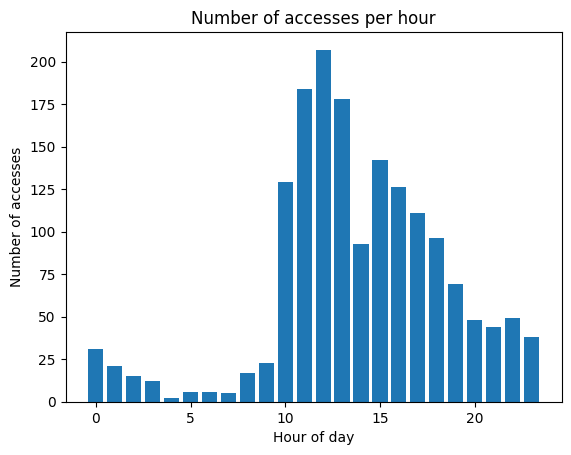

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv('data.csv')

# Convert the date column to a datetime object
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

# Group the data by hour
grouped = df.groupby(df['datetime'].dt.hour).size().reset_index(name='num_accesses')

# Plot the number of accesses against the hour
fig, ax = plt.subplots()
ax.bar(grouped['datetime'], grouped['num_accesses'])

# Add axis labels and a title
plt.xlabel('Hour of day')
plt.ylabel('Number of accesses')
plt.title('Number of accesses per hour')

# Show the plot
plt.show()

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the file containing the timestamp data
df = pd.read_csv("data.csv")

# Convert the timestamp column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

# Group the data by day and hour, and count the number of accesses
grouped = df.groupby([df['datetime'].dt.date, df['datetime'].dt.hour]).count()
grouped.index.names = ['date', 'hour']
# grouped.columns = ['count']
grouped.rename(columns={'datetime': 'count'}, inplace=True)
# grouped.reset_index(level=1, inplace=True)
# grouped.reset_index(level=0, inplace=True)
# grouped.reset_index(inplace=True)
grouped
# fig, ax = plt.subplots()
# ax.bar(grouped['date'], grouped['count'], width=0.4, align='center')


count
date       hour       
2023-01-23 0         3
           2         2
           3         1
           6         1
           9         1
...                ...
2023-02-04 14       10
           15        7
           16       14
           17        9
           18        6

[237 rows x 1 columns]

DatetimeIndex(['2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30',
               '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03',
               '2023-02-04'],
              dtype='datetime64[ns]', freq='D')


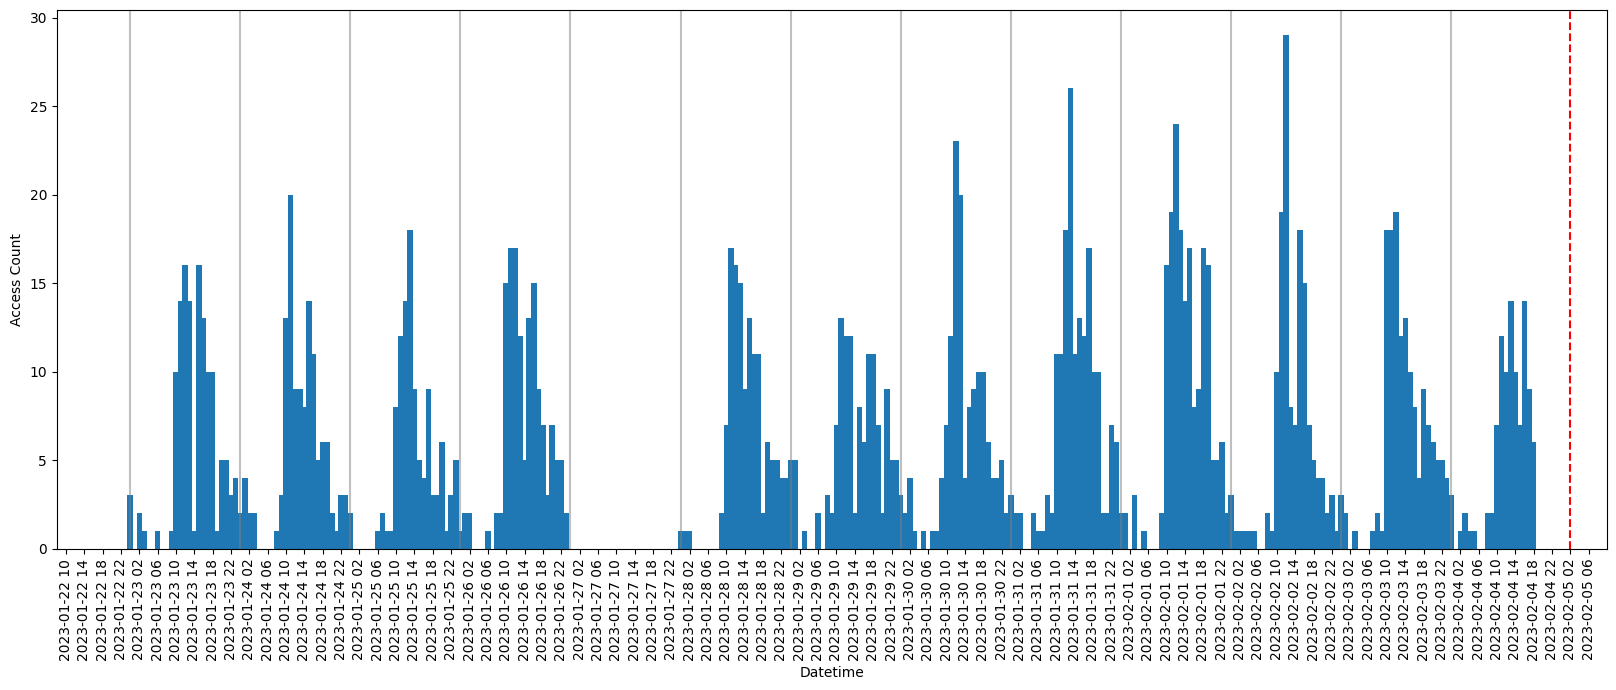

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the csv file into a dataframe
df = pd.read_csv("data.csv")

# Convert datetime column to datetime type
df["datetime"] = pd.to_datetime(df["datetime"])

# Group the datetime by hour and count the number of access
df.groupby(df["datetime"].dt.floor("H"))
df = df.groupby(df["datetime"].dt.floor("H")).size().reset_index(name='accessCount')

# # Plot the bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(df["datetime"], df["accessCount"], width=0.05)
# Format the x-axis labels to show the date and hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H"))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:00:00"))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))
# ax.set_xlim(df['datetime'].min(), df['datetime'].max())
# ax.set_xticks(df['datetime'])
plt.xlabel("Datetime")
plt.ylabel("Access Count")
plt.xticks(rotation=90)
# dates = df['datetime'].dt.date.unique()
firstDatetime = df['datetime'].iloc[0]
lastDatetime = df['datetime'].iloc[-1]
dates = pd.date_range(start=firstDatetime, end=lastDatetime, freq='D')
print(dates)
for i, date in enumerate(dates):
    plt.axvline(date, color='gray', alpha=0.5)
# Add bounding line for a specific date
date = "2023-02-05 02:00:00"
ax.axvline(pd.Timestamp(date), color='red', linestyle='--')

plt.show()

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the csv file into a dataframe
df = pd.read_csv("data.csv")

# Convert datetime column to datetime type
df["datetime"] = pd.to_datetime(df["datetime"])

# Group the datetime by hour and count the number of access
# df = df.groupby(df["datetime"].dt.floor("H")).size().reset_index(name='accessCount')
# df
# df.rename(index={'datetime': 'newname'}, inplace=True)
df = df.groupby(df["datetime"].dt.floor("H")).count()
df.columns = ['accessCount']
df.reset_index(inplace=True)
df
# grouped.rename(columns={'datetime': 'count'}, inplace=True)

,datetime,accessCount
0,2023-01-23 00:00:00,3
1,2023-01-23 02:00:00,2
2,2023-01-23 03:00:00,1
3,2023-01-23 06:00:00,1
4,2023-01-23 09:00:00,1
...,...,...
232,2023-02-04 14:00:00,10
233,2023-02-04 15:00:00,7
234,2023-02-04 16:00:00,14
235,2023-02-04 17:00:00,9
